<a href="https://colab.research.google.com/github/harshil1030/Drunk_face_Recognition/blob/main/drunk_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import shutil
import random

In [1]:
train_path="/content/drive/MyDrive/dataset/face_data/train/images"
val_path="/content/drive/MyDrive/dataset/face_data/val/images"
test_path="/content/drive/MyDrive/dataset/face_data/test"

In [2]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 16008, done.
remote: Counting objects: 100% (177/177), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 16008 (delta 110), reused 119 (delta 76), pack-reused 15831
Receiving objects: 100% (16008/16008), 14.65 MiB | 17.46 MiB/s, done.
Resolving deltas: 100% (10983/10983), done.


In [3]:
%cd yolov5/

/content/yolov5


In [4]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.4/612.4 kB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.9 MB/s eta 0:00:00


In [5]:
!wget https://github.com/ultralytics/yolov5/releases/tag/v7.0

--2023-06-27 08:49:24--  https://github.com/ultralytics/yolov5/releases/tag/v7.0
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘v7.0’

v7.0                    [ <=>                ] 344.56K  --.-KB/s    in 0.03s   

2023-06-27 08:49:25 (11.3 MB/s) - ‘v7.0’ saved [352831]



In [7]:
!python train.py --img 416 --batch 8 --epochs 150 --data /content/drive/MyDrive/dataset/face_data/data.yaml --weights yolov5n6.pt --nosave --cache

train: weights=yolov5n6.pt, cfg=, data=/content/drive/MyDrive/dataset/face_data/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=8, imgsz=416, rect=False, resume=False, nosave=True, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-187-g0004c74 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.

In [10]:
%load_ext tensorboard
%tensorboard --longdir runs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
2023-06-27 10:45:30.722119: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-27 10:45:31.503275: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC]
                   [--host ADDR] [--bind_all] [--port PORT]
                   [--reuse_port BOOL] [--load_fast {false,auto,true}]
                   [--extra_data_server_flags EXTRA_DATA_SERVER_FLAGS]
                   [--grpc_creds_type {local,ssl,ssl_dev}]
                   [--grpc_data_provider PORT] [--purge_orphaned_data BOOL]
                   [--db URI] [--db_import] [--inspect] [--version_tb]
    

#testing

In [ ]:
! python detect.py --source /content/drive/MyDrive/dataset/face_data/test --weights /content/yolov5/runs/train/exp/weights/last.pt --img 416 --save-txt --save-conf

detect: weights=['/content/yolov5/runs/train/exp/weights/last.pt'], source=/content/drive/MyDrive/dataset/face_data/test, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-186-g0acc5cf Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 206 layers, 3089188 parameters, 0 gradients, 4.2 GFLOPs
WARNING ⚠️ --img-size [416, 416] must be multiple of max stride 64, updating to [448, 448]
image 1/22 /content/drive/MyDrive/dataset/face_data/test/Drunkface106B1_jpeg.rf.68fb63e708f0c36345dcdcfab66a3590.jpg: 448x384 1 Drunk, 89.1ms
image 2/22 /content/drive/MyDrive/dataset/face_data/test/Drunkface107B1_jp

In [81]:
import glob

from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'):
    display(Image(filename=imageName))
    print ("\n")



#Retraining Model with more no of Epochs

In [ ]:
from google.colab import files
files.download('./runs/train/exp/weights/last.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#!python train.py --img 416 --batch 8 --epochs 150 --data /content/drive/MyDrive/dataset/face_data/data.yaml --weights /content/yolov5/runs/train/exp/weights/last.pt

In [11]:
from google.colab import files
files.download('./runs/train/exp2/weights/last.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2
import uuid
import os
import time


In [14]:
model=torch.hub.load('ultralytics/yolov5','custom',path='/content/yolov5/runs/train/exp2/weights/last.pt',force_reload=True)


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-6-27 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 206 layers, 3089188 parameters, 0 gradients, 4.2 GFLOPs
Adding AutoShape... 


In [68]:
# img= '/content/drive/MyDrive/dataset/face_data/test/Drunkface26B_jpg.rf.74da854a3b15e167e6b566cecd4db64c.jpg'
img=os.path.join('data' ,'images' , '/content/drive/MyDrive/dataset/face_data/test/Drunkface26B_jpg.rf.74da854a3b15e167e6b566cecd4db64c.jpg')

In [69]:
results=model(img)

In [70]:
results.print()

image 1/1: 423x306 1 Drunk
Speed: 10.1ms pre-process, 9.8ms inference, 1.7ms NMS per image at shape (1, 3, 640, 512)


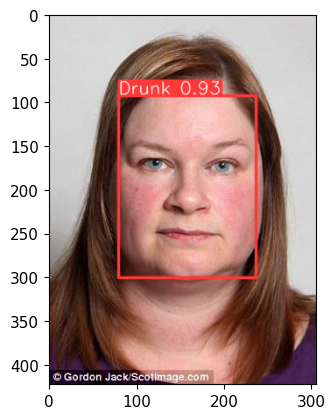

In [71]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [76]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()

    # Make detections
    results = model(frame)

    # Convert the results to a format compatible with cv2.imshow
    rendered_results = np.squeeze(results.render())
    rendered_results = rendered_results.astype(np.uint8)

    cv2.imshow('YOLO', rendered_results)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
